Instalação de Bibliotecas

In [1]:
!pip install -q seaborn
import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


2.3.0


## Base de Dados: Auto MPG

UCI Machine Learning Repository.

https://archive.ics.uci.edu/ml/index.php

<br>


Attribute Information:

1. mpg: continuous (miles per galon) (milhas por galão)
2. cylinders: multi-valued discrete
3. displacement: continuous
4. horsepower: continuous
5. weight: continuous
6. acceleration: continuous
7. model year: multi-valued discrete
8. origin: multi-valued discrete
9. car name: string (unique for each instance)


<br>

Ref:
Dua, D. and Graff, C. (2019). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.


## ETL: Extract, Transform, Load


## Extração dos dados

In [2]:
dataset_diretorio= keras.utils.get_file(
    "auto-mpg.data", "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"
    )
dataset_diretorio

'/root/.keras/datasets/auto-mpg.data'

In [3]:
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin']


dataset_puro = pd.read_csv(dataset_diretorio, names=column_names,
                      na_values = "?", comment='\t',
                      sep=" ", skipinitialspace=True)

# Criamos uma cópia, em que faremos processamento e aplicaremos o modelo
dataset = dataset_puro.copy()
dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [4]:
dataset.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


## Limpeza dos dados

In [5]:
dataset.isna()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
393,False,False,False,False,False,False,False,False
394,False,False,False,False,False,False,False,False
395,False,False,False,False,False,False,False,False
396,False,False,False,False,False,False,False,False


In [6]:
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

## Atribui dataset para o dataset com a remoção de todos NaNs (Not a Number)

In [7]:
dataset = dataset.dropna()

In [8]:
dataset.isna().sum().sum()

0

## Separação de Variáveis categóricas de variáveis numéricas (contínuas)

In [9]:
for col in dataset.columns:
  print(f" col {col} , Qtd de valores únicos: {len(dataset[col].unique())} , {list(dataset[col].unique())} \n ")

 col MPG , Qtd de valores únicos: 127 , [18.0, 15.0, 16.0, 17.0, 14.0, 24.0, 22.0, 21.0, 27.0, 26.0, 25.0, 10.0, 11.0, 9.0, 28.0, 19.0, 12.0, 13.0, 23.0, 30.0, 31.0, 35.0, 20.0, 29.0, 32.0, 33.0, 17.5, 15.5, 14.5, 22.5, 24.5, 18.5, 29.5, 26.5, 16.5, 31.5, 36.0, 25.5, 33.5, 20.5, 30.5, 21.5, 43.1, 36.1, 32.8, 39.4, 19.9, 19.4, 20.2, 19.2, 25.1, 20.6, 20.8, 18.6, 18.1, 17.7, 27.5, 27.2, 30.9, 21.1, 23.2, 23.8, 23.9, 20.3, 21.6, 16.2, 19.8, 22.3, 17.6, 18.2, 16.9, 31.9, 34.1, 35.7, 27.4, 25.4, 34.2, 34.5, 31.8, 37.3, 28.4, 28.8, 26.8, 41.5, 38.1, 32.1, 37.2, 26.4, 24.3, 19.1, 34.3, 29.8, 31.3, 37.0, 32.2, 46.6, 27.9, 40.8, 44.3, 43.4, 36.4, 44.6, 33.8, 32.7, 23.7, 32.4, 26.6, 25.8, 23.5, 39.1, 39.0, 35.1, 32.3, 37.7, 34.7, 34.4, 29.9, 33.7, 32.9, 31.6, 28.1, 30.7, 24.2, 22.4, 34.0, 38.0, 44.0] 
 
 col Cylinders , Qtd de valores únicos: 5 , [8, 4, 6, 3, 5] 
 
 col Displacement , Qtd de valores únicos: 81 , [307.0, 350.0, 318.0, 304.0, 302.0, 429.0, 454.0, 440.0, 455.0, 390.0, 383.0, 340.0,

## Origin é categórica, então precisa ser convertida, com **One-Hot encoding**

In [10]:
origin = dataset.pop('Origin')
origin

0      1
1      1
2      1
3      1
4      1
      ..
393    1
394    2
395    1
396    1
397    1
Name: Origin, Length: 392, dtype: int64

In [11]:
(origin == 2)

0      False
1      False
2      False
3      False
4      False
       ...  
393    False
394     True
395    False
396    False
397    False
Name: Origin, Length: 392, dtype: bool

In [12]:
(origin == 2)*1.0

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
393    0.0
394    1.0
395    0.0
396    0.0
397    0.0
Name: Origin, Length: 392, dtype: float64

In [13]:
dataset['USA'] = (origin == 1)*1.0
dataset['Europe'] = (origin == 2)*1.0
dataset['Japan'] = (origin == 3)*1.0
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
393,27.0,4,140.0,86.0,2790.0,15.6,82,1.0,0.0,0.0
394,44.0,4,97.0,52.0,2130.0,24.6,82,0.0,1.0,0.0
395,32.0,4,135.0,84.0,2295.0,11.6,82,1.0,0.0,0.0
396,28.0,4,120.0,79.0,2625.0,18.6,82,1.0,0.0,0.0
397,31.0,4,119.0,82.0,2720.0,19.4,82,1.0,0.0,0.0


## Separação em Treino e Teste:

\begin{equation}
D = \{ x_j \}_{j=1}^N \rightarrow \begin{cases} D_{treino} =  \{ x_j \}_{j=1}^K, & \mbox{(Treino)}  \\ D_{teste} =  \{ x_j \}_{j=K+1}^N, & \mbox{(Teste)}  \end{cases} \\
D = D_{treino} \cup D_{teste}
\end{equation}

Porcentagem de "split" $ = \frac{K*100}{N} \%$

No caso, vou escolher 80%

In [14]:
pct_split = 0.8

In [15]:
train_dataset = dataset.sample(frac=pct_split,random_state=0)

$D_{teste} = D - D_{treino}$

In [16]:
# retira dos dados totais, a parte de treino
test_dataset = dataset.drop(train_dataset.index)

## Pair-plots entre os dados contínuos

In [17]:
dataset.columns

Index(['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
       'Acceleration', 'Model Year', 'USA', 'Europe', 'Japan'],
      dtype='object')

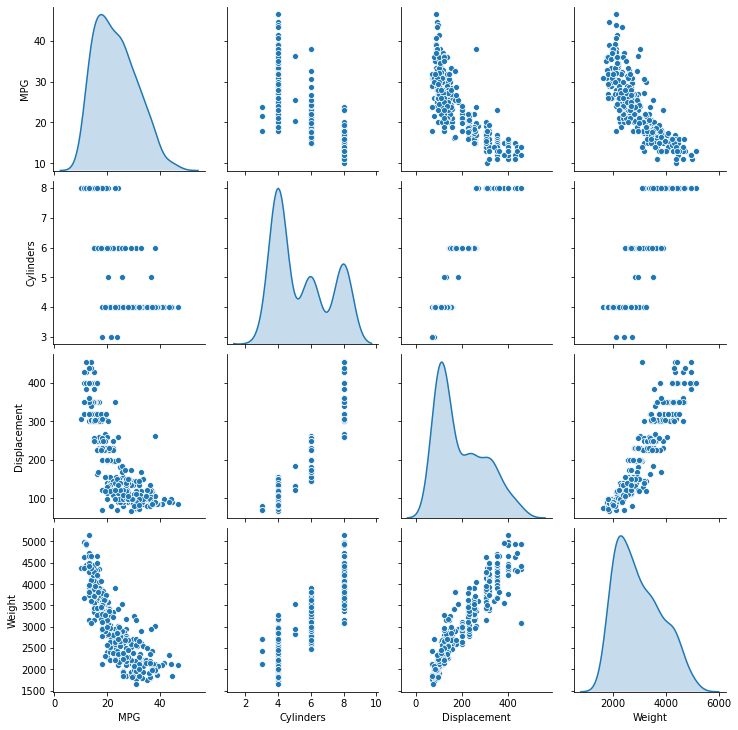

In [18]:
sns.pairplot(train_dataset[["MPG", "Cylinders", "Displacement", "Weight"]], diag_kind="kde")

## Vamos ver a descrição estatística dos dados:

In [19]:
train_stats = train_dataset.describe()

# Remoção da variável target
train_stats.pop("MPG")


train_stats = train_stats.T
train_stats

,count,mean,std,min,25%,50%,75%,max
Cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
Displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
Model Year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0
USA,314.0,0.624204,0.485101,0.0,0.00,1.0,1.00,1.0
Europe,314.0,0.178344,0.383413,0.0,0.00,0.0,0.00,1.0
Japan,314.0,0.197452,0.398712,0.0,0.00,0.0,0.00,1.0


## Separaremos as features (variáveis preditoras) da label (variável target)


- **variável target**: variável que o modelo pretende prever

- **variáveis preditora**s: variáveis utilizadas como input para o modelo realizar a previsão

In [20]:
train_labels = train_dataset.pop('MPG')
test_labels = test_dataset.pop('MPG')

## Normalização dos dados

Temos $X$ e padronizamos com $\mathcal{P}$  :$ \mathcal{P}(X)  \sim \mathcal{N}(\mu,\sigma^2)$

Fazemos isso por padronização:

\begin{equation}
z_i = \frac{x_i - \bar{x}}{\sigma^2} \quad, \forall x_i \in X
\end{equation}

$x_i = \frac{1}{|X|} \sum_{i=1}^{|X|}x_i$, $\sigma = \sqrt{\frac{1}{|X|} \sum_{i=1}^{|X|} (x_i - \bar{x})^2}$

In [21]:
def padroniza(x):
  return (x - train_stats['mean']) / train_stats['std']

In [22]:
normed_train_data = padroniza(train_dataset)
normed_test_data = padroniza(test_dataset)

In [23]:
normed_test_data.shape

(78, 9)

In [24]:
normed_train_data.shape

(314, 9)

Construção do modelo
==

Utilizaremos o modelo **Sequential**, com camadas **densamente conectadas**, e a camada de saída deve retornar um valor contínuo (não discreto).

<br>

### Função de Custo

Como o modelo é de Regressão, podemos utilizar a MSE - Erro Quadrado Médio (Mean Squared Error)



\begin{equation}
\mathcal{L}(\mathbf{W}, X) = \frac{1}{|X|} \sum_{x_i \in X} (y_i - f(x_i, \mathbf{W}))^2 
\end{equation}

In [25]:
def constroi_modelo():

  # modelo sequencial, com camadas densamente conectadas
  # Função de ativação ReLU (boa para evitar o decaimento excessivo dos pesos e do gradiente)
  # output de um valor numérico, na última camada
  model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])

  # escolha do otimizador
  optimizer = tf.keras.optimizers.RMSprop(0.001)

  # Função de custo Erro Quadrado Médio (Mean Squared Error)
  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [26]:
model = constroi_modelo()
model


In [27]:
model.__dict__

{'_activity_regularizer': None,
 '_auto_track_sub_layers': False,
 '_autocast': False,
 '_base_model_initialized': True,
 '_build_input_shape': TensorShape([None, 9]),
 '_callable_losses': [],
 '_compiled_trainable_state': <WeakKeyDictionary at 0x7fbba408c2b0>,
 '_compute_dtype_object': tf.float32,
 '_compute_output_and_mask_jointly': True,
 '_created_nodes': set(),
 '_default_training_arg': None,
 '_distribution_strategy': None,
 '_dtype_defaulted_to_floatx': True,
 '_dtype_policy': <Policy "float32", loss_scale=None>,
 '_dynamic': False,
 '_enable_dict_to_input_mapping': True,
 '_expects_mask_arg': True,
 '_expects_training_arg': True,
 '_feed_input_names': ['dense_input'],
 '_feed_input_shapes': [(None, 9)],
 '_feed_inputs': [<tf.Tensor 'dense_input:0' shape=(None, 9) dtype=float32>],
 '_graph_initialized': True,
 '_has_explicit_input_shape': True,
 '_inbound_nodes': [],
 '_inferred_input_shape': None,
 '_initial_weights': None,
 '_input_coordinates': [(<tensorflow.python.keras.engi

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                640       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
_________________________________________________________________


## Testando o modelo.

Selecionar Batch de 10 exemplos:

In [29]:
example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
example_result

array([[0.2498445 ],
       [0.1358087 ],
       [0.7076582 ],
       [0.17611624],
       [0.4932208 ],
       [0.20471212],
       [0.5383117 ],
       [0.22876209],
       [0.10749222],
       [0.5475221 ]], dtype=float32)

## Treinamento do modelo


Setar quantidade de épocas de treinamento, armazenando a acurácia de treino e validação em **history**

In [30]:
## Esta classe auxilia a visualização do progresso
class MostraProgresso(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: 
      print('')
    print('-', end='')

In [31]:
EPOCHS = 1000

In [32]:
history = model.fit(
    x=normed_train_data,
    y=train_labels,
    epochs=EPOCHS,
    validation_split=0.2,
    verbose=0,
    callbacks=[MostraProgresso()]
)


----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------

In [33]:
history.__dict__.keys()

dict_keys(['validation_data', 'model', '_chief_worker_only', '_supports_tf_logs', 'history', 'params', 'epoch'])

In [34]:
history.history.keys()

dict_keys(['loss', 'mae', 'mse', 'val_loss', 'val_mae', 'val_mse'])

In [35]:
historico = pd.DataFrame(history.history)
historico['epoch'] = history.epoch
historico.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
995,2.874888,1.107013,2.874888,8.728869,2.224972,8.728869,995
996,2.700818,1.073705,2.700818,9.247972,2.273790,9.247972,996
997,2.998488,1.152238,2.998488,9.164078,2.233855,9.164078,997
998,2.629946,1.067930,2.629946,9.133616,2.235770,9.133616,998
999,2.740798,1.118513,2.740798,8.810756,2.321855,8.810756,999


In [36]:
historico.describe()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,7.338053,1.566342,7.338053,11.699949,2.394156,11.699949,499.500000
std,32.704077,1.438001,32.704077,30.399579,1.270185,30.399579,288.819436
min,2.624854,1.064211,2.624854,8.221895,2.123201,8.221895,0.000000
25%,3.422091,1.257218,3.422091,8.783888,2.228908,8.783888,249.750000
50%,4.109386,1.388714,4.109386,8.962668,2.260553,8.962668,499.500000
75%,5.024543,1.545822,5.024543,9.160808,2.295734,9.160808,749.250000
max,548.820923,22.051544,548.820923,532.758179,21.546749,532.758179,999.000000


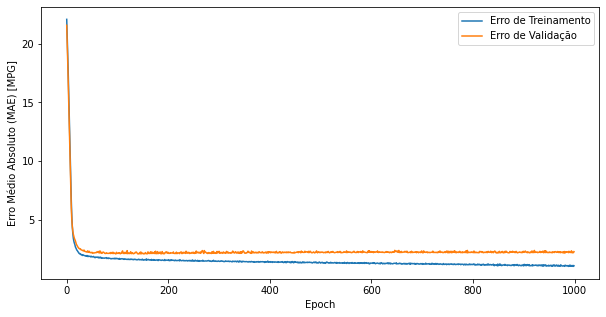

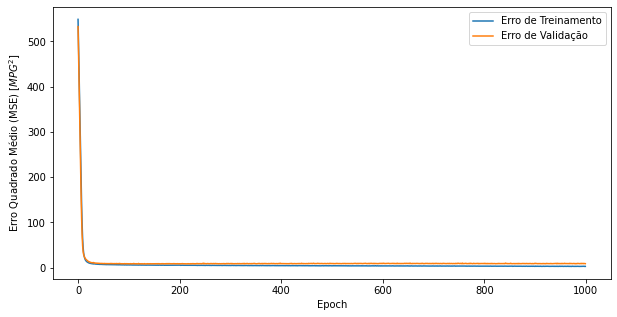

In [37]:
def plota_historico(history, limita=False):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure(figsize=(10,5))
  plt.xlabel('Epoch')
  plt.ylabel('Erro Médio Absoluto (MAE) [MPG]')
  plt.plot(hist['epoch'], hist['mae'],
           label='Erro de Treinamento')
  plt.legend(loc='best', fontsize=25)
  plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Erro de Validação')
  plt.legend(loc='best', fontsize=25)
  if limita == True:
    plt.ylim([0,5])
  plt.legend()

  plt.figure(figsize=(10,5))
  plt.xlabel('Epoch')
  plt.ylabel('Erro Quadrado Médio (MSE) [$MPG^2$]')
  plt.plot(hist['epoch'], hist['mse'],
           label='Erro de Treinamento')
  plt.legend(loc='best', fontsize=25)
  plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Erro de Validação')
  plt.legend(loc='best', fontsize=25)
  if limita == True:
    plt.ylim([0,20])
  plt.legend()
  plt.show()


plota_historico(history)

## Vamos então utilizar a técnica de **Early Stopping**, cessando o treinamendo quando o score de validação não aumentar mais.


-------------------------------------------------------------------------------

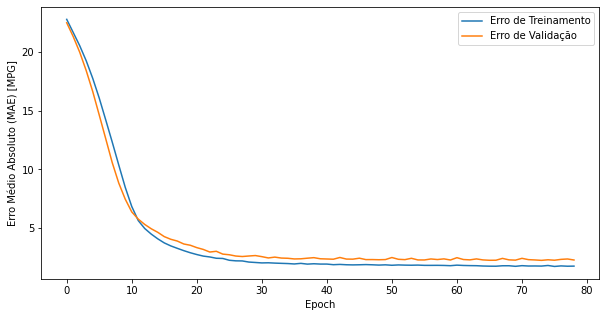

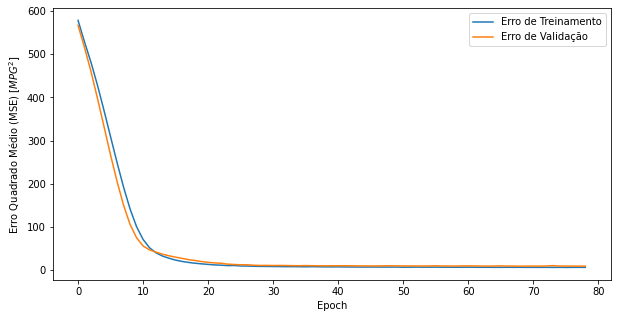

In [38]:
model = constroi_modelo()

# O paramêtro patience é o quantidade de epochs para checar as melhoras
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(normed_train_data, train_labels, epochs=EPOCHS,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop, MostraProgresso()])

plota_historico(history)

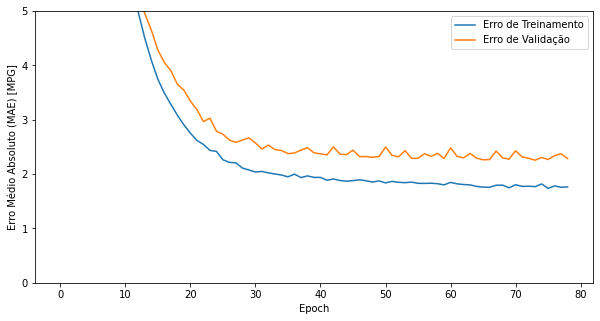

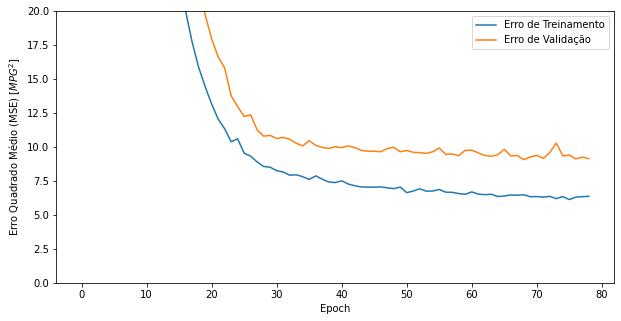

In [39]:
plota_historico(history, limita=True)

In [40]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=2)

print(" \n Erro Absoluto Médio de Teste: {:5.2f} MPG \n ".format(mae))

3/3 - 0s - loss: 6.2368 - mae: 2.0230 - mse: 6.2368
 
 Erro Absoluto Médio de Teste:  2.02 MPG 
 


## Previsões

Faremos previsões de valores de MPG, utilizando o conjunto de teste.

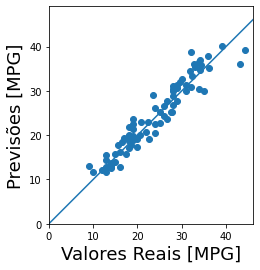

In [41]:
previsoes_teste = model.predict(normed_test_data).flatten()

plt.scatter(test_labels, previsoes_teste)
plt.xlabel('Valores Reais [MPG]', fontsize=18)
plt.ylabel('Previsões [MPG]', fontsize=18)
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

## Vamos verificar a distribuição dos erros, e ver se são de distribuição aproximadamente Gaussiana

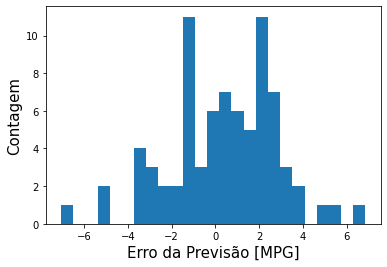

In [42]:
erro = previsoes_teste - test_labels
plt.hist(erro, bins = 25)
plt.xlabel("Erro da Previsão [MPG]", fontsize=15)
_ = plt.ylabel("Contagem", fontsize=15)
plt.show()

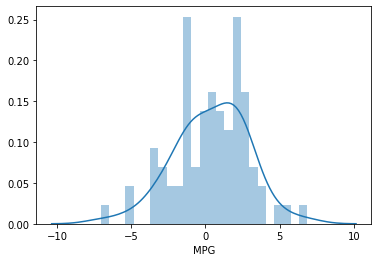

In [43]:
sns.distplot(a=erro, bins=25)
plt.show()

        #
        # Copyright (c) 2017 François Chollet
        #
        # Permission is hereby granted, free of charge, to any person obtaining a
        # copy of this software and associated documentation files (the "Software"),
        # to deal in the Software without restriction, including without limitation
        # the rights to use, copy, modify, merge, publish, distribute, sublicense,
        # and/or sell copies of the Software, and to permit persons to whom the
        # Software is furnished to do so, subject to the following conditions:
        #
        # The above copyright notice and this permission notice shall be included in
        # all copies or substantial portions of the Software.
        #
        # THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
        # IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
        # FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL
        # THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
        # LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING
        # FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER
        # DEALINGS IN THE SOFTWARE.